In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import 

<h3> Warren Buffet 4 Rules </h3>

  <ul>
    <li>vigilant leadership - risk exposure history</li>
    <li>sector longevity - will be able to sell their product in 30 years</li>
    <li>stable and understandable - at least 10 years consistency</li>
    <li>attrative intrinsic value</li>
  </ul>

<h3>Valuation</h3>
http://www.moneychimp.com/articles/valuation/buffett_calc.htm

<h5>ROE(Return of Earnings) = Net Income(sales minus cost of goods sold, how much revenue exceeds the expenses of an organization) ÷ Shareholder's Equity (company’s total assets minus its debt, liabilities) 
    ROE of 1.2 means that for every dollar you put in, the company will earn $1.20. 
    <h5>
        
        
        
<p>Book Value (Carrying value)-the net asset value of a company calculated as total assets minus intangible assets (patents, goodwill) and liabilities. reflects the total value of a company's assets that shareholders of that company would receive if the company were to be liquidated </p>


<p> debt-to-equity ratio  (D/E) </p>
<p>Price to Earning (P/E) - </p>


In [ ]:
# getting financial data from SEC
# pip install python-edgar
import edgar
download_directory = '/'
year = 2000
edgar.download_index(download_directory, since_year, skip_all_present_except_last=False)

In [5]:



df = pd.read_csv('./ons_generated_power_history.csv')
df
df.head(3)

#TODO: create a timestamp_dataframe

,tipo_de_geracao,regiao,unidade_de_medida,ano,mes,geracao_de_energia
0,EME,NE,GWh,2002,1,5.15
1,EME,NE,GWh,2002,2,0.00
2,EME,NE,GWh,2002,3,0.13


In [6]:
df.geracao_de_energia.describe()

count     7680.000000
mean      4132.134406
std       8741.866042
min          0.000000
25%          0.000000
50%        836.515000
75%       3714.952500
max      57261.830000
Name: geracao_de_energia, dtype: float64

In [7]:
def get_columns_values(column: str):
    print('------------------------------------')
    print('VALUES COUNT', column)
    print(df[column].value_counts())
    print('------------------------------------')

In [5]:
columns_collection = ['tipo_de_geracao','regiao','unidade_de_medida','ano']
for _ in columns_collection:
    get_columns_values(_)

------------------------------------
VALUES COUNT tipo_de_geracao
HID    2160
TER    1800
EME    1680
EOL    1320
NUC     720
Name: tipo_de_geracao, dtype: int64
------------------------------------
------------------------------------
VALUES COUNT regiao
SE/CO       1680
Sistemas    1680
N           1320
NE          1320
S           1320
Itaipu       360
Name: regiao, dtype: int64
------------------------------------
------------------------------------
VALUES COUNT unidade_de_medida
Mwmed    3840
GWh      3840
Name: unidade_de_medida, dtype: int64
------------------------------------
------------------------------------
VALUES COUNT ano
2015    552
2011    552
2007    552
2014    552
2010    552
2013    552
2009    552
2016    552
2012    552
2008    552
2003    432
2006    432
2002    432
2005    432
2004    432
Name: ano, dtype: int64
------------------------------------


In [35]:
# util function to filter df 
def filter_df_using_unity_generationtype_region(measurement_unit: str, generation_type: str,region: str): 
    filtered_df = df.loc[df.unidade_de_medida == measurement_unit]
    filtered_df = filtered_df.loc[filtered_df['tipo_de_geracao'] == generation_type]  
    filtered_df = filtered_df.loc[filtered_df['regiao'] == region]  
    return filtered_df

In [36]:
# Mw
only_hydro_mw_se_co = filter_df_using_unity_generationtype_region("Mwmed","HID", "SE/CO")
only_thermo_mw_se_co = filter_df_using_unity_generationtype_region("Mwmed","TER", "SE/CO")
only_eolic_mw_se_co = filter_df_using_unity_generationtype_region("Mwmed","EOL", "SE/CO")
# Gw
only_hydro_gw_se_co = filter_df_using_unity_generationtype_region("GWh","HID", "SE/CO")
only_thermo_gw_se_co = filter_df_using_unity_generationtype_region("GWh","TER", "SE/CO")
only_eolic_gw_se_co = filter_df_using_unity_generationtype_region("GWh","EOL", "SE/CO")

In [54]:
def plot_linear_chart_generated_power_from_filtered_df(plot_lib,df_x_data):
    if plot_lib =="matplotlib":
        #plt.figure(figsize=(16,6))
        plt.plot(range(0, len(df_x_data['mes'])), 
                 df_x_data['geracao_de_energia'])

        plt.show()
    if plot_lib =="seaborn":
        #plt.figure(figsize=(16,6))
        sns.color_palette("RdBu", n_colors=7)
        sns.lineplot(x= range(0, len(df_x_data['mes'])),
                     y= df_x_data['geracao_de_energia'],
                     style=df_x_data['tipo_de_geracao'],
                     #palette="ch:2.5,.25",
                     #hue=df_x_data['tipo_de_geracao']
                    )

    #print(df_x_data.describe())

In [55]:
# charts input
filtered_collection = [only_hydro_mw_se_co, 
                       only_thermo_mw_se_co,
                       only_eolic_mw_se_co,
                       only_hydro_gw_se_co,
                       only_thermo_gw_se_co,
                       only_eolic_gw_se_co]

In [56]:
# Using MATPLOTLIB will render each one separeted
#for i in filtered_collection:
    #plot_linear_chart_generated_power_from_filtered_df('matplotlib', i)

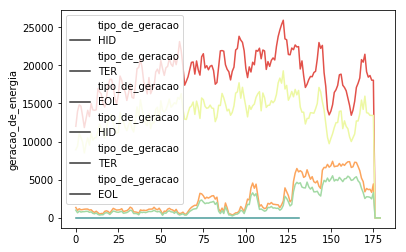

In [57]:
# using SEABORN will render all charts together
for i in filtered_collection:
    plot_linear_chart_generated_power_from_filtered_df('seaborn', i)
    

In [9]:
def plot_simple(data,color, title):
    plt.figure(figsize=(15,7.5)) # location matters, if inside loop will plot each one 
    
    for i in range(len(data)):
        sns.set_palette(color[i])
        sns.lineplot(  
                     x= range(len(data[i])),
                     y= 'geracao_de_energia',
                     data = data[i],
                     hue='regiao',
                    )
        plt.ylabel("Mw")
        plt.title(title) 
        plt.xlabel("Months")
    

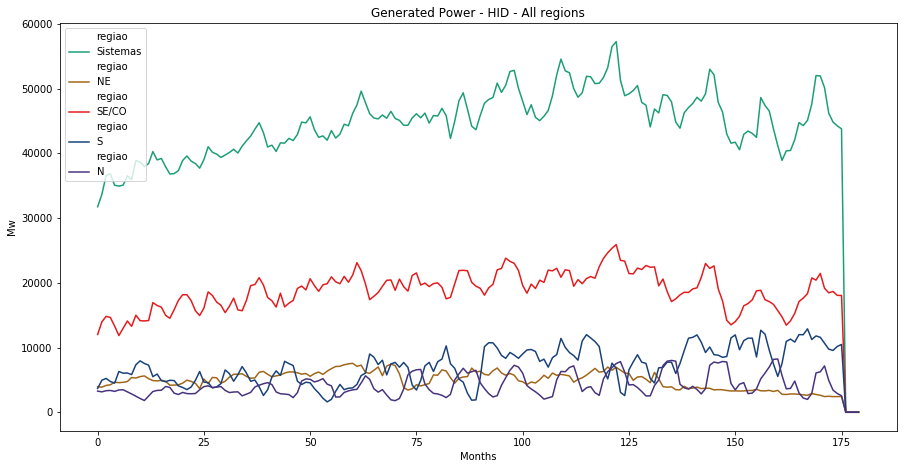

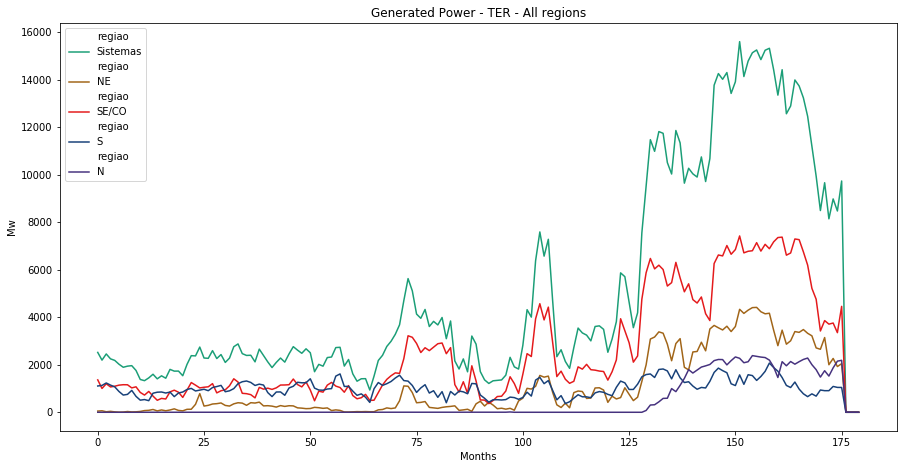

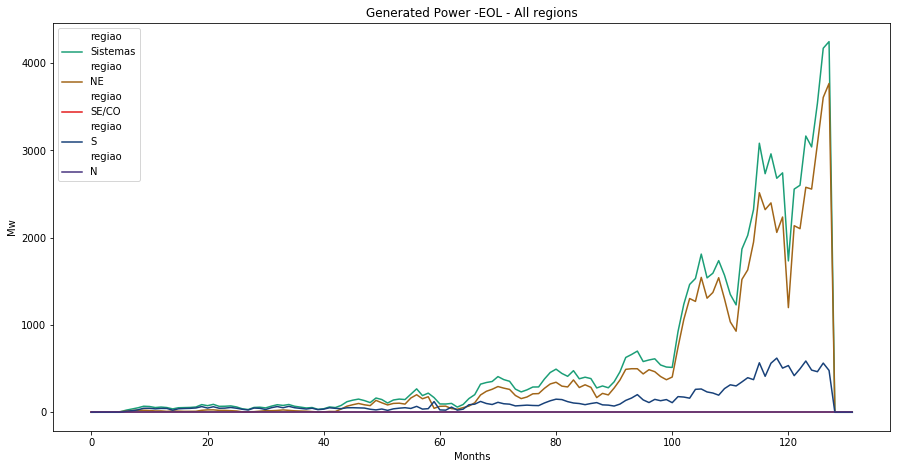

In [11]:
#print(df.columns)
#df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],
#type(df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],)
#plot_simple(df.loc[df['tipo_de_geracao'] == "EOL"])
collection_eol = [
                   df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "Sistemas") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "SE/CO") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "S") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "N") & (df['unidade_de_medida'] == "Mwmed")],
                 ]

collection_hydro = [
                   df.loc[(df['tipo_de_geracao'] == "HID") & (df['regiao'] == "Sistemas") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "HID") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "HID") & (df['regiao'] == "SE/CO") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "HID") & (df['regiao'] == "S") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "HID") & (df['regiao'] == "N") & (df['unidade_de_medida'] == "Mwmed")],
                 ]

collection_thermo = [
                   df.loc[(df['tipo_de_geracao'] == "TER") & (df['regiao'] == "Sistemas") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "TER") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "TER") & (df['regiao'] == "SE/CO") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "TER") & (df['regiao'] == "S") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['tipo_de_geracao'] == "TER") & (df['regiao'] == "N") & (df['unidade_de_medida'] == "Mwmed")],
                 ]

collection_all_types = [
                   df.loc[(df['regiao'] == "Sistemas") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['regiao'] == "SE/CO") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['regiao'] == "S") & (df['unidade_de_medida'] == "Mwmed")],
                   df.loc[(df['regiao'] == "N") & (df['unidade_de_medida'] == "Mwmed")],
                 ]

#seaborn pallet = https://s3.amazonaws.com/codecademy-content/programs/dataviz-python/unit-5/seaborn-design-2/article2_image9.png
color_collection = ["Dark2",'BrBG','Set1','gist_earth','viridis']

#plot_simple(collection_all_types, color_collection, "Generated Power -All types - All regions")

plot_simple(collection_hydro, color_collection, "Generated Power - HID - All regions")
plot_simple(collection_thermo, color_collection, "Generated Power - TER - All regions")
plot_simple(collection_eol, color_collection, "Generated Power -EOL - All regions")


#plot_simple(df.loc[(df['tipo_de_geracao'] == "EOL") & (df['regiao'] == "NE") & (df['unidade_de_medida'] == "Mwmed")],)


In [12]:
something = df.loc[df['tipo_de_geracao'] == "EOL"]
type(something)

pandas.core.frame.DataFrame

In [137]:
df_3= df.loc[(df['tipo_de_geracao'] == "EOL")  & (df['unidade_de_medida'] == "Mwmed")]
type(df_3)

pandas.core.frame.DataFrame

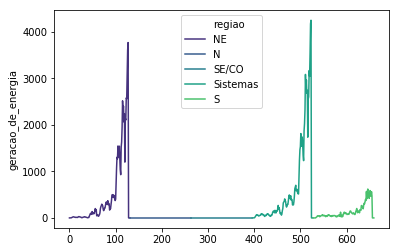

In [134]:
sns.lineplot(  
             x= range(len(df_3)),
             y= 'geracao_de_energia',
             data = df_3,
             hue='regiao',
            )